# Westeros bis - emissions introduction and analysis

In this scenario, a fixed carbon price will be implemented as a market-based method for limiting emission alternative to emissions cap (reference scenario ``westeros_bis_emissions_cap2.ipynb``), and the existence of a 'sweet spot carbon price' will be explored.

The base for this scenario will be the ``westeros_bis_energymix1.ipynb``, with the implementation of:
- emission impact of gas and coal
- carbon tax.

### Pre-requisites
- You have the MESSAGEix framework installed and working
- You have run (``westeros_bis_baseline.ipynb``) scenario and solved it successfully
- You have run (``westeros_bis_energymix1.ipynb``) scenario

In [1]:
import pandas as pd
import ixmp
import message_ix

from message_ix.util import make_df

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
mp = ixmp.Platform()

Recalling the model and the scenarios ``westeros_bis_energymix1.ipynb``

In [3]:
model = 'Westeros Electrified'
base = message_ix.Scenario(mp, model=model, scenario='energy mix1')

Recalling ``westeros_bis_emission2.ipynb`` and plotting its emissions and carbon prices.

In [4]:
scen_em = message_ix.Scenario(mp, model=model, scenario='emissions2')

In [5]:
emissions = scen_em.var('EMISS', {'node': 'Westeros'})
emissions

,node,emission,type_tec,year,lvl,mrg
0,Westeros,CO2,all,700,463.083699,0.0
1,Westeros,CO2,all,710,659.578145,0.0
2,Westeros,CO2,all,720,677.338155,0.0


In [6]:
emission_prices = scen_em.var('PRICE_EMISSION')
emission_prices

,node,type_emission,type_tec,year,lvl,mrg
0,Westeros,GHG,all,700,10.339077,0.0
1,Westeros,GHG,all,710,16.841266,0.0
2,Westeros,GHG,all,720,27.432648,0.0


Creating ``westeros_bis_carbon_tax.ipynb`` scenario by cloning ``westeros_bis_energymix1.ipynb``

In [7]:
scen_tax = base.clone(model, 'carbon tax','adding price of carbon',
                  keep_solution=False)
scen_tax.check_out()

In [8]:
year_df = scen_tax.vintage_and_active_years()
vintage_years, act_years = year_df['year_vtg'], year_df['year_act']
model_horizon = scen_tax.set('year') 
country = 'Westeros'

We will now introduce
- emission of CO2
- emission category GHG
- emission factors defined in ``westeros_bis_emissons_capX.ipynb`` scenarios.

In [9]:
scen_tax.add_set('emission', 'CO2')
scen_tax.add_cat('emission', 'GHG', 'CO2')
scen_tax.add_par('emission_factor', scen_em.par('emission_factor'))
scen_tax.par('emission_factor')

,node_loc,technology,year_vtg,year_act,mode,emission,value,unit
0,Westeros,coal_ppl,690,700,standard,CO2,7.07,tCO2/kWa
1,Westeros,coal_ppl,690,710,standard,CO2,7.07,tCO2/kWa
2,Westeros,coal_ppl,690,720,standard,CO2,7.07,tCO2/kWa
3,Westeros,coal_ppl,700,700,standard,CO2,7.07,tCO2/kWa
4,Westeros,coal_ppl,700,710,standard,CO2,7.07,tCO2/kWa
5,Westeros,coal_ppl,700,720,standard,CO2,7.07,tCO2/kWa
6,Westeros,coal_ppl,710,710,standard,CO2,7.07,tCO2/kWa
7,Westeros,coal_ppl,710,720,standard,CO2,7.07,tCO2/kWa
8,Westeros,coal_ppl,720,720,standard,CO2,7.07,tCO2/kWa
9,Westeros,ngcc_ppl,690,700,standard,CO2,3.11,tCO2/kWa


Introducing a fixed carbon tax

In [10]:
scen_tax.add_set('type_year', [700, 710, 720])

base_tax_emission = {
    'node': 'Westeros',
    'type_year': [700, 710, 720],
    'type_tec': 'all',
    'unit': 'USD/tCO2',
    'type_emission': 'GHG',
    'value': 21, ################################### key line of the scenario!#######################################à
}

# in case you need to add the new unit to the platform
mp.add_unit('USD/tCO2')

tax_emission = make_df(base_tax_emission)
scen_tax.add_par('tax_emission', tax_emission)
scen_tax.par('tax_emission')

INFO:root:unit `USD/tCO2` is already defined in the platform instance


,node,type_emission,type_tec,type_year,value,unit
0,Westeros,GHG,all,700,21.0,USD/tCO2
1,Westeros,GHG,all,710,21.0,USD/tCO2
2,Westeros,GHG,all,720,21.0,USD/tCO2


Solving the model

In [11]:
scen_tax.commit(comment='introducing price on emissions')
scen_tax.set_as_default()

In [12]:
scen_tax.solve()

In [13]:
scen_tax.var('OBJ')['lvl']

602933.5625

In [14]:
scen_tax.var('EMISS', {'node': 'Westeros'})

,node,emission,type_tec,year,lvl,mrg
0,Westeros,CO2,all,700,299.653239,0.0
1,Westeros,CO2,all,710,432.713670,0.0
2,Westeros,CO2,all,720,613.904141,0.0


# Plotting the results

In [15]:
from message_ix.reporting import Reporter
from message_ix.util.tutorial import prepare_plots

rep = Reporter.from_scenario(scen_tax)
prepare_plots(rep)

Activity

<AxesSubplot:title={'center':'Westeros Energy System Activity'}, xlabel='Year', ylabel='GWa'>

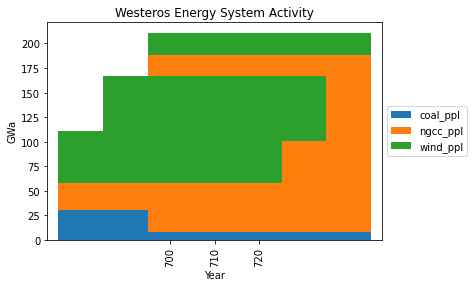

In [16]:
rep.set_filters(t=["coal_ppl", "wind_ppl","ngcc_ppl"])
rep.get("plot activity")

Capacity

<AxesSubplot:title={'center':'Westeros Energy System Capacity'}, xlabel='Year', ylabel='GW'>

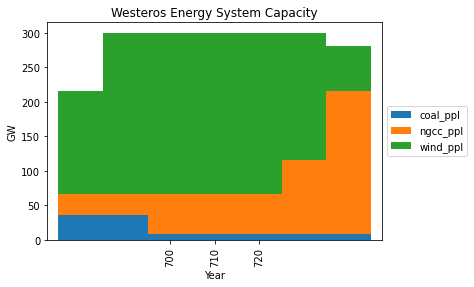

In [17]:
rep.get("plot capacity")

Electricy price

<AxesSubplot:title={'center':'Westeros Energy System Prices'}, xlabel='Year', ylabel='¢/kW·h'>

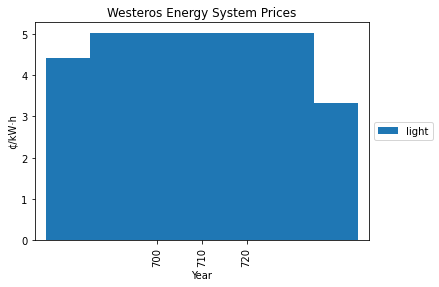

In [18]:
rep.set_filters(t=None, c=["light"])
rep.get("plot prices")

# Comments on the results

- With a fixed carbon price up to 20 USD/tCO2 the wind is still not present in the third decade. 
- With a fixed carbon price over 33 USD/tCO2 the coal is not present after the first decade.

We conclude that a 'sweet spot' is found in the range of [21 - 32] USD/tCO2, with respectively 
- [602933.5 - 670602.5] total system cost, against 408462.5 of the non-constrained ``westeros_bis_energymix1.ipynb`` and 427093.1 of emissions cap constrained ``westeros_bis_emissions2.ipynb``
- (4.5, 5, 3.5) - (6.1, 4.5, 4.5) ¢/kW·h electricity prices, against (4, 4.5, 4) ¢/kW·h of ``westeros_bis_emissions2.ipynb``

The carbon emissions in the three decades for the whole range of [21 - 32] USD/tCO2 are equal to (300, 433, 614) MtCO2, against (463, 660, 677) of ``westeros_bis_emissions2.ipynb``

## Findings
In conclusion, overpricing carbon has no positive effect for both the energy system and the end user of electricity, because the overall cost and the electricity price are considerably higher with no effect of emissions reduction.

In the necessity of severe carbon reduction, the carbon tax of 21 USD/tCO2 is the right pathway, while if a moderate reduction is enough (maybe for Westeros but not for planet Earth) it is way more economically convenient to set an emission cap with lower cost on the overall system.

Close connection to the database

In [19]:
mp.close_db()